# *FOR ITEM A*
# Converting the Dataset .txt to .csv:

There are several methods to convert a text file (.txt) to Comma Seperated Values (.csv):

1. The easiest method is to manually rename the extension of the target text file from .txt to .csv - providing the data are already formatted in the CSV format.

2. Secondly, on Macs with the application 'Numbers' (the MacOS native spreadsheet app), the dataset file can be opened directly from Finder using 'Open With...'. This method is slightly lengthier than simply renaming the file extension, but the .txt file (if correctly formatted) will automatically be arranged in tabular form with columns delienated by commas. The file can then be 'Save As...' and change the extension from .txt to .csv

3. Thirdly, by using Microsoft Excel on any platforms supporting it natively. We do this by opening the Excel application and start by creating a new spreadsheet. On the 'Data' tab, the .txt file is opened by selecting 'Get External Data' and 'From Text' options. An Import Wizard screen will be shown where detailed options with regards to handling the data can be selected. Once applicable options have been modified, clicking 'Finish' will terminate the Import Wizard and open the .txt file according to set parameters. The spreadsheet can then be saved as a .csv file from the main menu.

4. Finally, there are many free online tools available that could automatically convert .txt files to .csv, although using this method is not recommended in most cases as their authenticity could not always be determined.

Number of NaN values of each column:

Surgery          1
Age              0
Hosp No          0
Rect Temp       60
Heart Rate      24
Respi Rate      58
Ext Temp        56
Peri Pulse      69
Mucosa          47
CRT             32
Pain            55
Peristalsis     44
Abdo Dist       56
NG Tube        104
NG Ref Vol     106
NG Ref pH      247
Feces Amt      102
Int Feces      118
PCV             29
Proteins        33
Ab_cen App     165
Ab_cen Prt     198
Outcome          1
Les_Exist        0
Les_Site         0
Les_Type         0
Les_Sub          0
Les_Code         0
Path_Data      300
dtype: int64 

Data types of each column:

Surgery        float64
Age              int64
Hosp No          int64
Rect Temp      float64
Heart Rate     float64
Respi Rate     float64
Ext Temp       float64
Peri Pulse     float64
Mucosa         float64
CRT            float64
Pain           float64
Peristalsis    float64
Abdo Dist      float64
NG Tube        float64
NG Ref Vol     float64
NG Ref pH      float64


(300, 29)

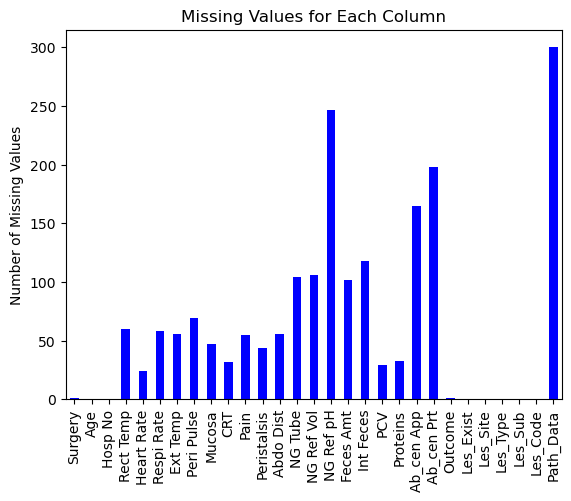

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# *FOR ITEM B*
## Opening .csv dataset in Jupyter Notebook:
df = pd.read_csv('Data Files/horse-colic.csv', header=None)

# *FOR ITEM C AND D*
## Replacing missing values with NaN, then saving as new .csv file:
df.replace('?', np.nan, inplace=True)
#df.replace(r'[^a-z0-9\s]', np.nan, regex=True, inplace=True)
df.to_csv('Data Files/horse-colic-with-NaN.csv', header=None, index=False)

# *FOR ITEM E ANG F*
## Rename the column headers, then saving the edited Dataframe as new .csv file:
column_names = ['Surgery','Age','Hosp No','Rect Temp','Heart Rate','Respi Rate','Ext Temp','Peri Pulse',
                'Mucosa','CRT','Pain','Peristalsis','Abdo Dist','NG Tube','NG Ref Vol','NG Ref pH','Feces Amt',
                'Int Feces','PCV','Proteins','Ab_cen App','Ab_cen Prt','Outcome','Les_Exist','Les_Site',
                'Les_Type','Les_Sub','Les_Code','Path_Data']

df = pd.read_csv('Data Files/horse-colic-with-NaN.csv', header=None, names=column_names)
df.to_csv('Data Files/horse-colic-with-title.csv', index=False)

# *FOR ITEM G*
## Loading the .csv file and displaying the NaN values:
dfnan = df.isnull().sum()
print('Number of NaN values of each column:\n')
print(dfnan,'\n')

# *FOR ITEM H*
## Plotting the NaN values of each column on a bar chart. Matplotlib Pyplot is imported:
dfnan.plot(kind='bar', color='blue')
plt.title('Missing Values for Each Column')
plt.ylabel('Number of Missing Values')

# *FOR ITEM I*
## Displaying data types for column values in the Dataset:
print('Data types of each column:\n')
print(df.dtypes,'\n')

# *TESTING EXTRAS*
dfnan2 = df.drop(df.columns[-1:],axis=1)
print('Total Number of NaN in Dataset:')
print(dfnan2.isnull().sum().sum())
df.shape

# *FOR ITEM J*
# Dropping NaN values?

With regards to the NaN values found in the DataFrame, the decision to delete/remove NaN rows will depend on several factors:

1. If the intention is to delete ALL rows containing NaN values, this will result in deletion of the whole dataset, considering the column 'Pathology Data' consists of rows which are entirely NaN. Even excluding Pathology Data (since it was mentioned that none were actually collected and hence the column is not significant), some columns (e.g. Nasogastric Tube Reflux pH' and Abdominocentesis Protein') have majority of their rows consisting of NaN values. Removing all rows with NaN significantly shrinks the sample size of the dataset.

2. However, if the intention is to remove only the NaN rows of each column individually

In [ ]:
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer

# load the dataset
# replace '?' with NaN

'''Importing the .csv file as the Pandas DataFrame and preserving the first row.
This prevents the DataFrame from converting the first row into Header/Column Names.
Without this distinction, the '?' in the first row would not be properly converted
into NaN in later codes

'''
dataframe = pd.read_csv('Data Files/horse-colic.csv', header=None)
dataframe.replace('?', NaN, inplace=True)
data = dataframe.values

# <to code>
totalCol = data.shape[1]
ix = [i for i in range(totalCol) if i != 23]
X = data[:, ix]
y = data[:, 23]

# <to code>
print('Missing: %d' % sum(isnan(X).flatten()))

# <to code>
imputer = SimpleImputer(strategy='mean')
# <to code>
imputer.fit(X)
Xtrans = imputer.transform(X)

# <to code>
print('Missing: %d' % sum(isnan(Xtrans).flatten()))